In [67]:
%reload_ext autoreload

In [68]:
from data_cleaner import boxcox_trans
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
user_df = pd.read_csv('datasets/googleplaystore_user_reviews.csv')
overall_df = pd.read_csv('datasets/googleplaystore.csv')

In [70]:
overall_df = overall_df[overall_df.Rating < 5.1]

In [71]:
overall_df.Price = overall_df.Price.apply(lambda x: x.replace('$', '')).astype('float')
overall_df.Installs = overall_df.Installs.apply(lambda x: x.replace('+', '')).apply(lambda x: x.replace(',', '')).astype('int')

In [72]:
overall_df['Content Rating'].value_counts()

Everyone           7420
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [73]:
user_df.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [74]:
user_df.Sentiment.replace('Positive', 1, inplace=True)
user_df.Sentiment.replace('Neutral' , .5, inplace=True)
user_df.Sentiment.replace('Negative', 0, inplace=True)

In [75]:
user_df.Sentiment.value_counts()

1.0    23998
0.0     8271
0.5     5163
Name: Sentiment, dtype: int64

In [76]:
overall_df.drop_duplicates('App', inplace=True)

In [77]:
overall_df.Size.value_counts()

Varies with device    1169
14M                    149
12M                    146
11M                    144
13M                    143
                      ... 
916k                     1
170k                     1
293k                     1
963k                     1
208k                     1
Name: Size, Length: 414, dtype: int64

In [78]:
merging_df = overall_df.drop('Size', axis=1).drop('Type', axis=1)

In [79]:
merging_df.Reviews = merging_df.Reviews.astype('int')

In [80]:
merging_df2 = user_df.groupby('App').mean()

In [81]:
merging_df2.dropna(inplace=True)

In [82]:
merging_df.set_index('App', inplace=True)

In [83]:
combined_df = merging_df.join(merging_df2, how='outer',)

In [84]:
combined_df.shape 

(8245, 13)

In [85]:
combined_df.dropna(inplace=True)

In [86]:
combined_df['Content Rating'].value_counts()

Everyone           652
Teen                87
Mature 17+          47
Everyone 10+        29
Adults only 18+      1
Name: Content Rating, dtype: int64

In [87]:
combined_df.drop('Category', axis=1, inplace=True)

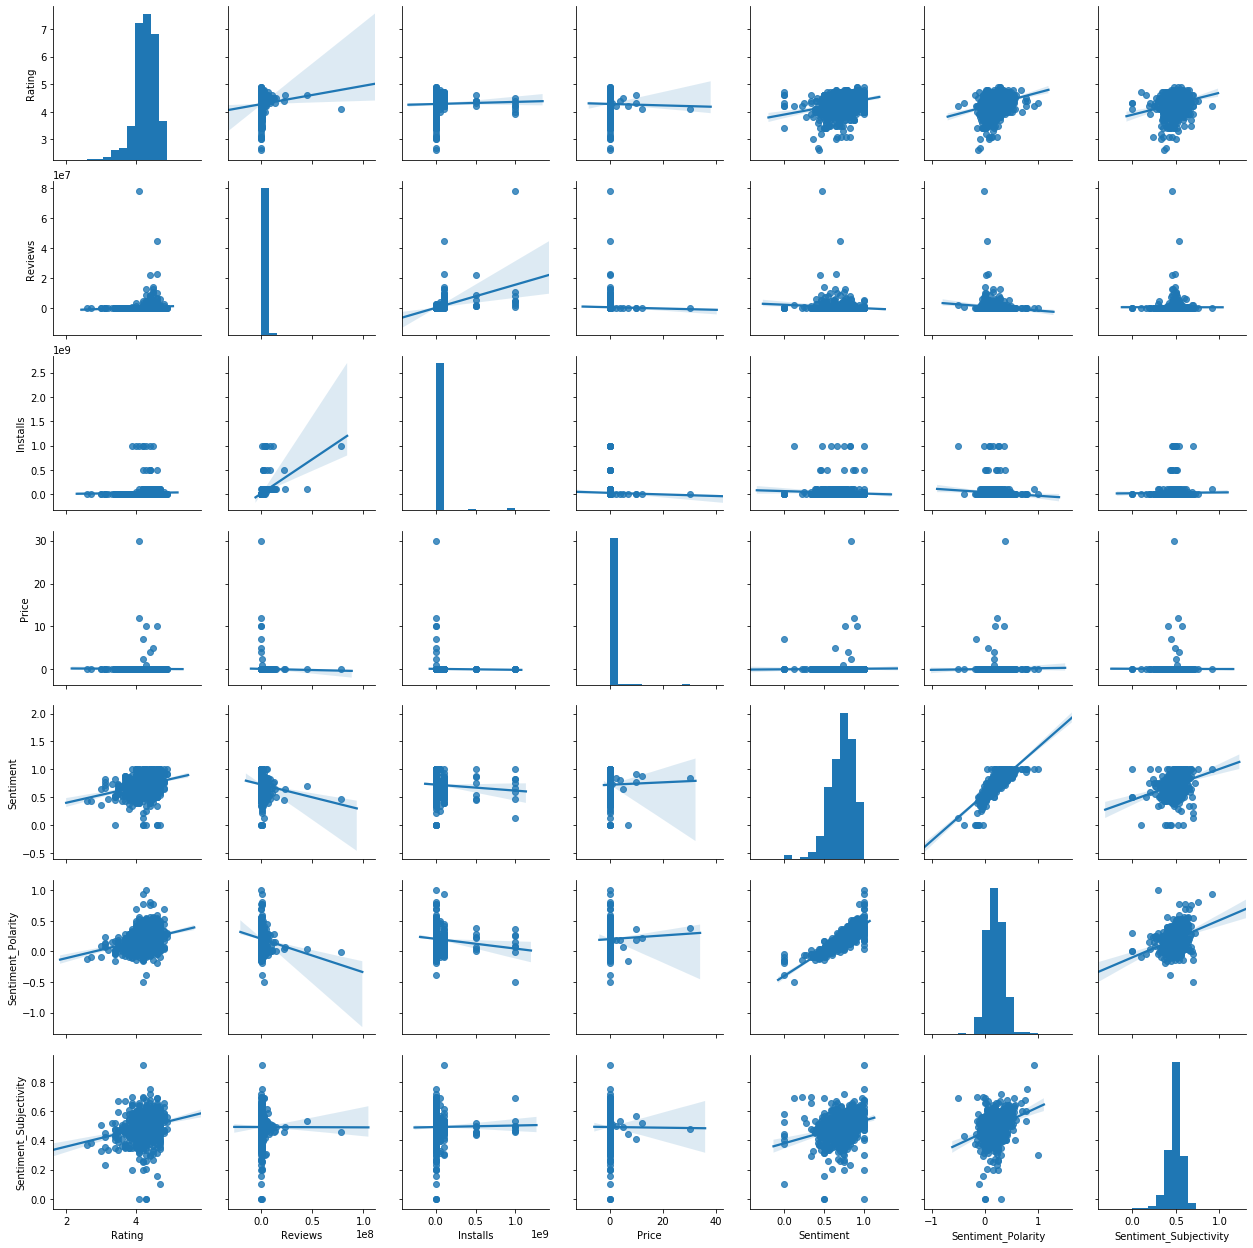

In [88]:
import seaborn as sns 


sns.pairplot(combined_df, kind='reg')

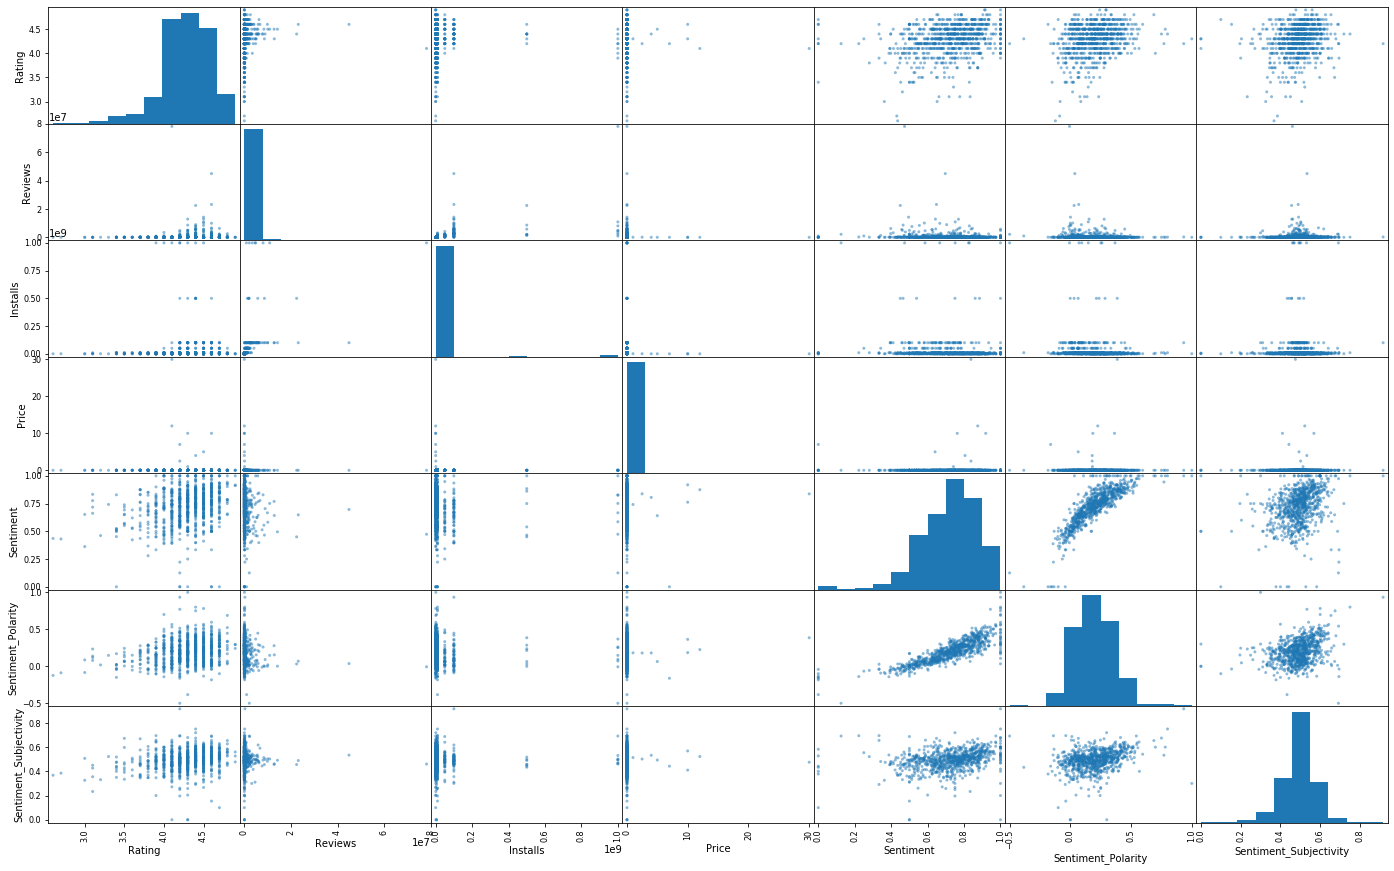

In [22]:
pd.plotting.scatter_matrix(combined_df,figsize=(24,15));
plt.savefig('nontransformed.png')

In [89]:
import scipy.stats as stats

boxcox_trans(combined_df, 'Reviews', remove_col=True)
boxcox_trans(combined_df, 'Rating', remove_col=True)
boxcox_trans(combined_df, 'Installs', remove_col=True)
# combined_df['log_installs'] = np.log(combined_df.Installs)

,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,boxcox_Reviews,boxcox_Rating,boxcox_Installs
App,,,,,,,,,,,,
10 Best Foods for You,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,0.891753,0.470733,0.495455,7.374914,346.522155,13.745769
11st,0.0,Everyone,Shopping,"July 31, 2018",7.8.1,4.0 and up,0.700000,0.181294,0.443957,9.958354,262.094657,17.065360
1800 Contacts - Lens Store,0.0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,0.862500,0.318145,0.591098,9.323017,833.525703,14.507654
1LINE – One Line with One Touch,0.0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0.750000,0.196290,0.557315,11.204375,741.465653,17.065360
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.0,Everyone,Personalization,"May 22, 2018",Varies with device,4.1 and up,0.875000,0.449566,0.520573,10.688417,451.927587,17.065360
...,...,...,...,...,...,...,...,...,...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.0,Everyone,Travel & Local,"July 4, 2018",Varies with device,Varies with device,0.632353,0.101622,0.545444,11.362813,657.876488,17.065360
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.0,Everyone,Tools,"August 6, 2018",6.1.0,4.1 and up,0.705882,0.251765,0.393284,12.555758,451.927587,18.877827
Hotstar,0.0,Teen,Entertainment,"August 3, 2018",Varies with device,Varies with device,0.500000,0.038178,0.493964,13.738121,513.675983,19.664745


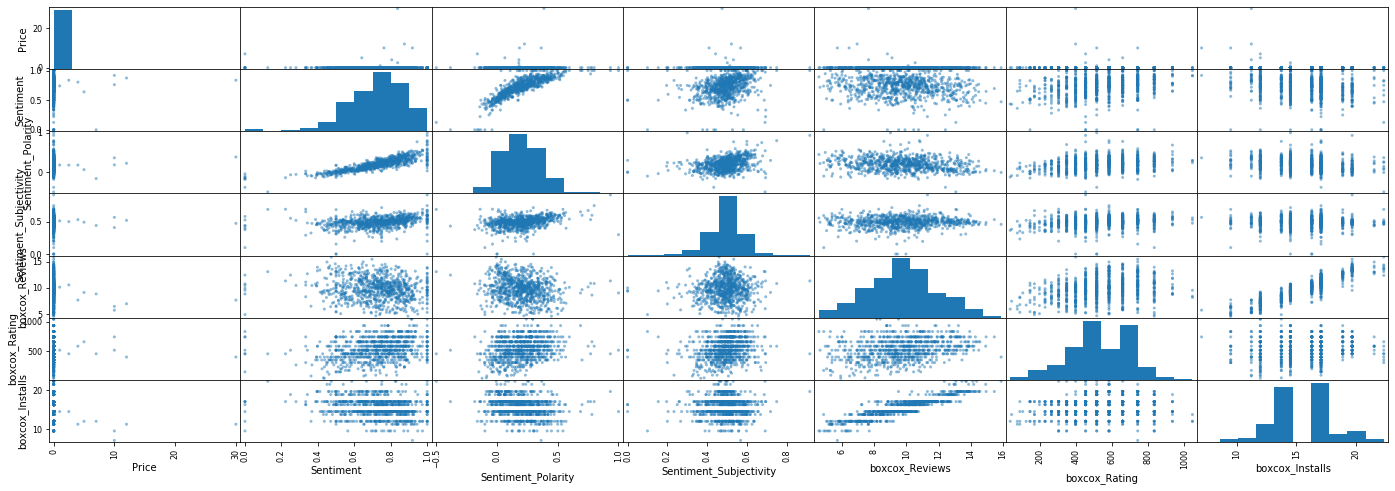

In [90]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(combined_df, figsize=(24,8))
plt.show();

In [91]:
combined_df

,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,boxcox_Reviews,boxcox_Rating,boxcox_Installs
App,,,,,,,,,,,,
10 Best Foods for You,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,0.891753,0.470733,0.495455,7.374914,346.522155,13.745769
11st,0.0,Everyone,Shopping,"July 31, 2018",7.8.1,4.0 and up,0.700000,0.181294,0.443957,9.958354,262.094657,17.065360
1800 Contacts - Lens Store,0.0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,0.862500,0.318145,0.591098,9.323017,833.525703,14.507654
1LINE – One Line with One Touch,0.0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0.750000,0.196290,0.557315,11.204375,741.465653,17.065360
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.0,Everyone,Personalization,"May 22, 2018",Varies with device,4.1 and up,0.875000,0.449566,0.520573,10.688417,451.927587,17.065360
...,...,...,...,...,...,...,...,...,...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.0,Everyone,Travel & Local,"July 4, 2018",Varies with device,Varies with device,0.632353,0.101622,0.545444,11.362813,657.876488,17.065360
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.0,Everyone,Tools,"August 6, 2018",6.1.0,4.1 and up,0.705882,0.251765,0.393284,12.555758,451.927587,18.877827
Hotstar,0.0,Teen,Entertainment,"August 3, 2018",Varies with device,Varies with device,0.500000,0.038178,0.493964,13.738121,513.675983,19.664745


In [92]:
combined_df_cat = combined_df['Content Rating']

In [93]:
combined_df

,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,boxcox_Reviews,boxcox_Rating,boxcox_Installs
App,,,,,,,,,,,,
10 Best Foods for You,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,0.891753,0.470733,0.495455,7.374914,346.522155,13.745769
11st,0.0,Everyone,Shopping,"July 31, 2018",7.8.1,4.0 and up,0.700000,0.181294,0.443957,9.958354,262.094657,17.065360
1800 Contacts - Lens Store,0.0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,0.862500,0.318145,0.591098,9.323017,833.525703,14.507654
1LINE – One Line with One Touch,0.0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,0.750000,0.196290,0.557315,11.204375,741.465653,17.065360
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.0,Everyone,Personalization,"May 22, 2018",Varies with device,4.1 and up,0.875000,0.449566,0.520573,10.688417,451.927587,17.065360
...,...,...,...,...,...,...,...,...,...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.0,Everyone,Travel & Local,"July 4, 2018",Varies with device,Varies with device,0.632353,0.101622,0.545444,11.362813,657.876488,17.065360
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.0,Everyone,Tools,"August 6, 2018",6.1.0,4.1 and up,0.705882,0.251765,0.393284,12.555758,451.927587,18.877827
Hotstar,0.0,Teen,Entertainment,"August 3, 2018",Varies with device,Varies with device,0.500000,0.038178,0.493964,13.738121,513.675983,19.664745


In [94]:
target = combined_df['boxcox_Installs']
features = combined_df.iloc[:,6:11]
whole = pd.concat([features, target], axis=1)

In [95]:
whole

,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,boxcox_Reviews,boxcox_Rating,boxcox_Installs
App,,,,,,
10 Best Foods for You,0.891753,0.470733,0.495455,7.374914,346.522155,13.745769
11st,0.700000,0.181294,0.443957,9.958354,262.094657,17.065360
1800 Contacts - Lens Store,0.862500,0.318145,0.591098,9.323017,833.525703,14.507654
1LINE – One Line with One Touch,0.750000,0.196290,0.557315,11.204375,741.465653,17.065360
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.875000,0.449566,0.520573,10.688417,451.927587,17.065360
...,...,...,...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.632353,0.101622,0.545444,11.362813,657.876488,17.065360
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.705882,0.251765,0.393284,12.555758,451.927587,18.877827
Hotstar,0.500000,0.038178,0.493964,13.738121,513.675983,19.664745


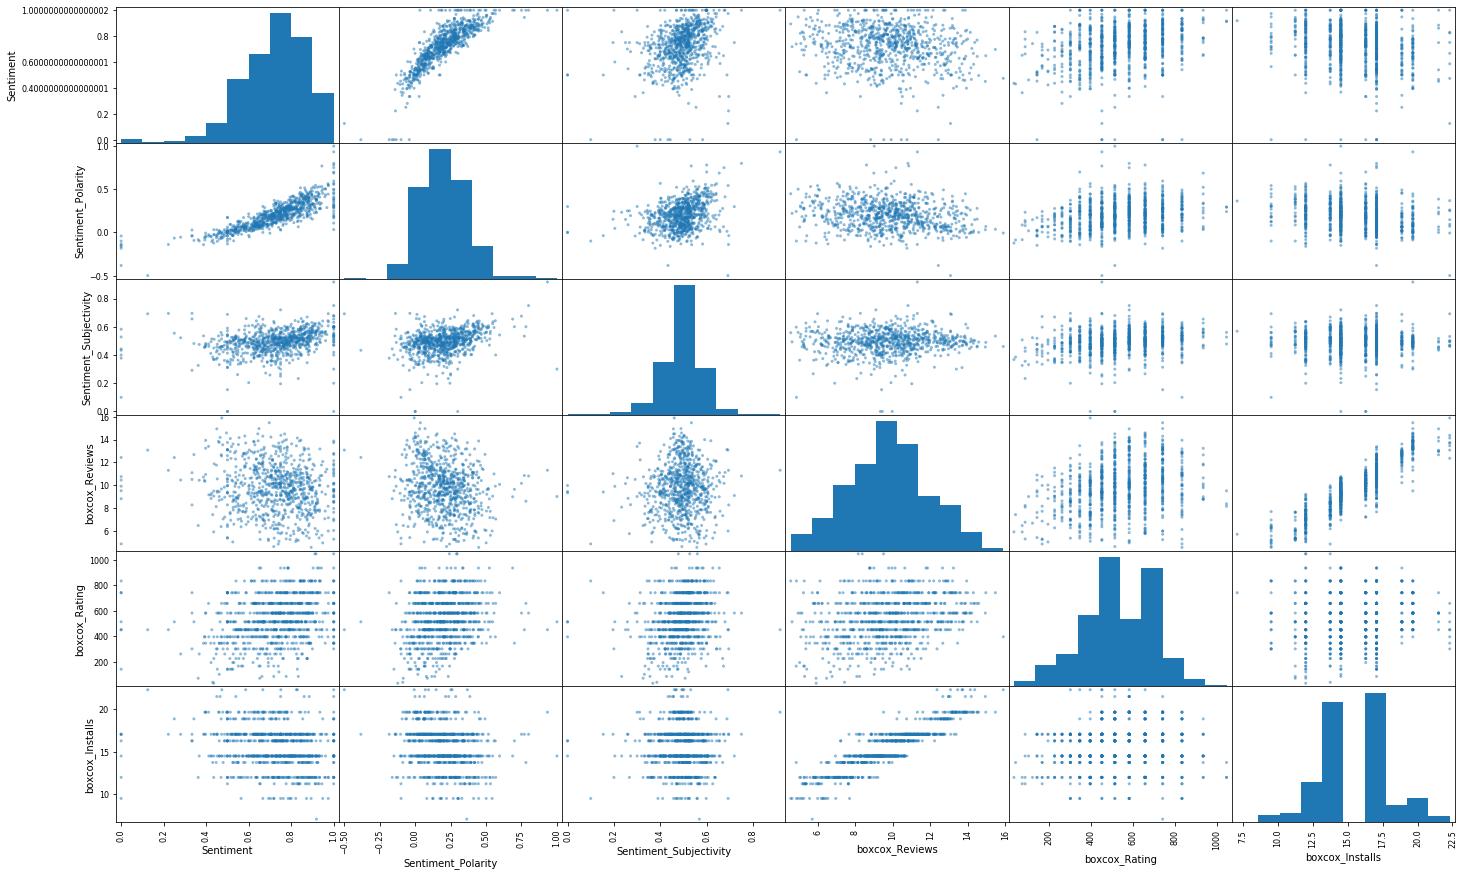

In [96]:
pd.plotting.scatter_matrix(whole, figsize=(24,15))
plt.savefig('transformed.png')

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# ss_df = pd.DataFrame(scaler.fit_transform(features),index=features.index, columns=features.columns)
ss_df = pd.DataFrame(scaler.fit_transform(whole), index=whole.index, columns=whole.columns)

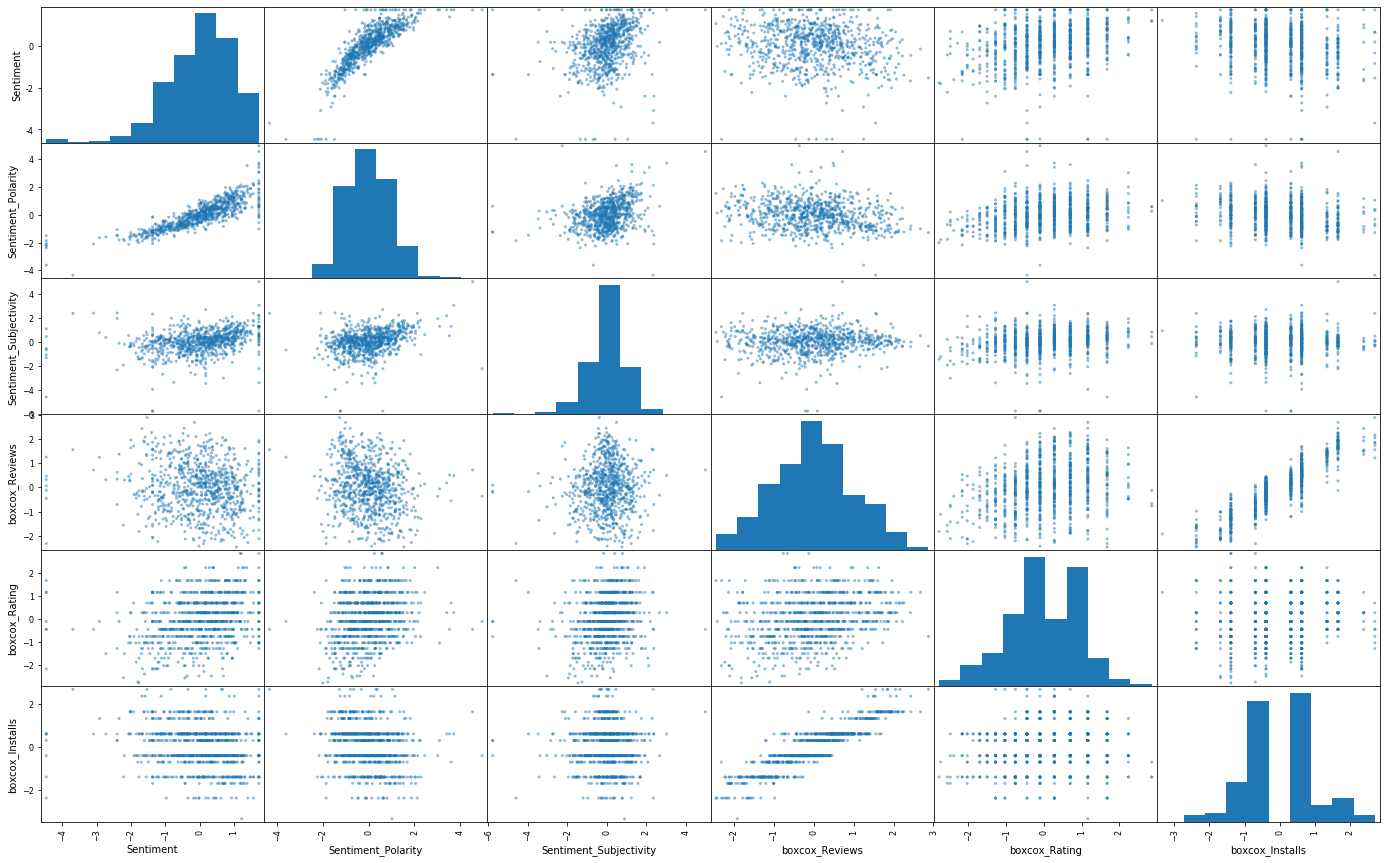

In [98]:
pd.plotting.scatter_matrix(ss_df, figsize=(24,15));

In [99]:
ss_df.corr()

,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,boxcox_Reviews,boxcox_Rating,boxcox_Installs
Sentiment,1.000000,0.837532,0.293284,-0.128522,0.270833,-0.188120
Sentiment_Polarity,0.837532,1.000000,0.319732,-0.191458,0.244924,-0.220625
Sentiment_Subjectivity,0.293284,0.319732,1.000000,0.055535,0.205513,-0.005800
boxcox_Reviews,-0.128522,-0.191458,0.055535,1.000000,0.280680,0.898443
boxcox_Rating,0.270833,0.244924,0.205513,0.280680,1.000000,0.117700
boxcox_Installs,-0.188120,-0.220625,-0.005800,0.898443,0.117700,1.000000


In [100]:
import numpy as np

ss_df = ss_df[(np.abs(stats.zscore(ss_df)) < 2).all(axis=1)]
ss_df.corr()

,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,boxcox_Reviews,boxcox_Rating,boxcox_Installs
Sentiment,1.000000,0.831620,0.339353,-0.109912,0.279170,-0.191067
Sentiment_Polarity,0.831620,1.000000,0.326494,-0.194034,0.236025,-0.230429
Sentiment_Subjectivity,0.339353,0.326494,1.000000,0.055059,0.233351,-0.032494
boxcox_Reviews,-0.109912,-0.194034,0.055059,1.000000,0.277784,0.885710
boxcox_Rating,0.279170,0.236025,0.233351,0.277784,1.000000,0.133332
boxcox_Installs,-0.191067,-0.230429,-0.032494,0.885710,0.133332,1.000000


In [101]:
ss_df.drop('Sentiment', axis=1, inplace=True)

In [111]:
dummies_df = pd.get_dummies(combined_df_cat, drop_first=True)

In [112]:
feature_df = ss_df.join(dummies_df)

In [113]:
feature_df

,Sentiment_Polarity,Sentiment_Subjectivity,boxcox_Reviews,boxcox_Rating,boxcox_Installs,Everyone,Everyone 10+,Mature 17+,Teen
App,,,,,,,,,
10 Best Foods for You,1.675664,0.041458,-1.131387,-1.033459,-0.696141,0,1,0,0
11st,-0.118915,-0.563531,0.084268,-1.503225,0.620424,1,0,0,0
1800 Contacts - Lens Store,0.729587,1.165069,-0.214694,1.676295,-0.393974,1,0,0,0
1LINE – One Line with One Touch,-0.025936,0.768189,0.670591,1.164061,0.620424,1,0,0,0
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,1.544425,0.336544,0.427804,-0.446969,0.620424,1,0,0,0
...,...,...,...,...,...,...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,-0.612897,0.628727,0.745146,0.698959,0.620424,1,0,0,0
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.318017,-1.158827,1.306494,-0.446969,1.339256,1,0,0,0
Hotstar,-1.006265,0.023947,1.862862,-0.103392,1.651352,0,0,0,1


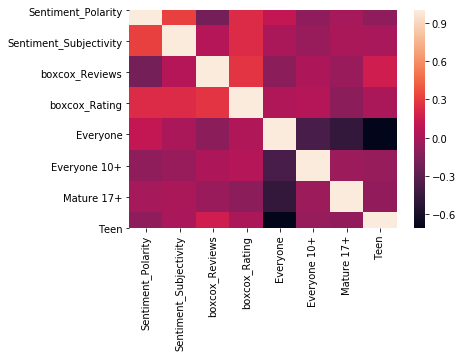

In [116]:
sns.heatmap(feature.corr())

In [105]:
target = feature_df['boxcox_Installs']
feature = feature_df.drop('boxcox_Installs', axis=1)

In [106]:
feature

,Sentiment_Polarity,Sentiment_Subjectivity,boxcox_Reviews,boxcox_Rating,Everyone,Everyone 10+,Mature 17+,Teen
App,,,,,,,,
10 Best Foods for You,1.675664,0.041458,-1.131387,-1.033459,0,1,0,0
11st,-0.118915,-0.563531,0.084268,-1.503225,1,0,0,0
1800 Contacts - Lens Store,0.729587,1.165069,-0.214694,1.676295,1,0,0,0
1LINE – One Line with One Touch,-0.025936,0.768189,0.670591,1.164061,1,0,0,0
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,1.544425,0.336544,0.427804,-0.446969,1,0,0,0
...,...,...,...,...,...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,-0.612897,0.628727,0.745146,0.698959,1,0,0,0
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.318017,-1.158827,1.306494,-0.446969,1,0,0,0
Hotstar,-1.006265,0.023947,1.862862,-0.103392,0,0,0,1


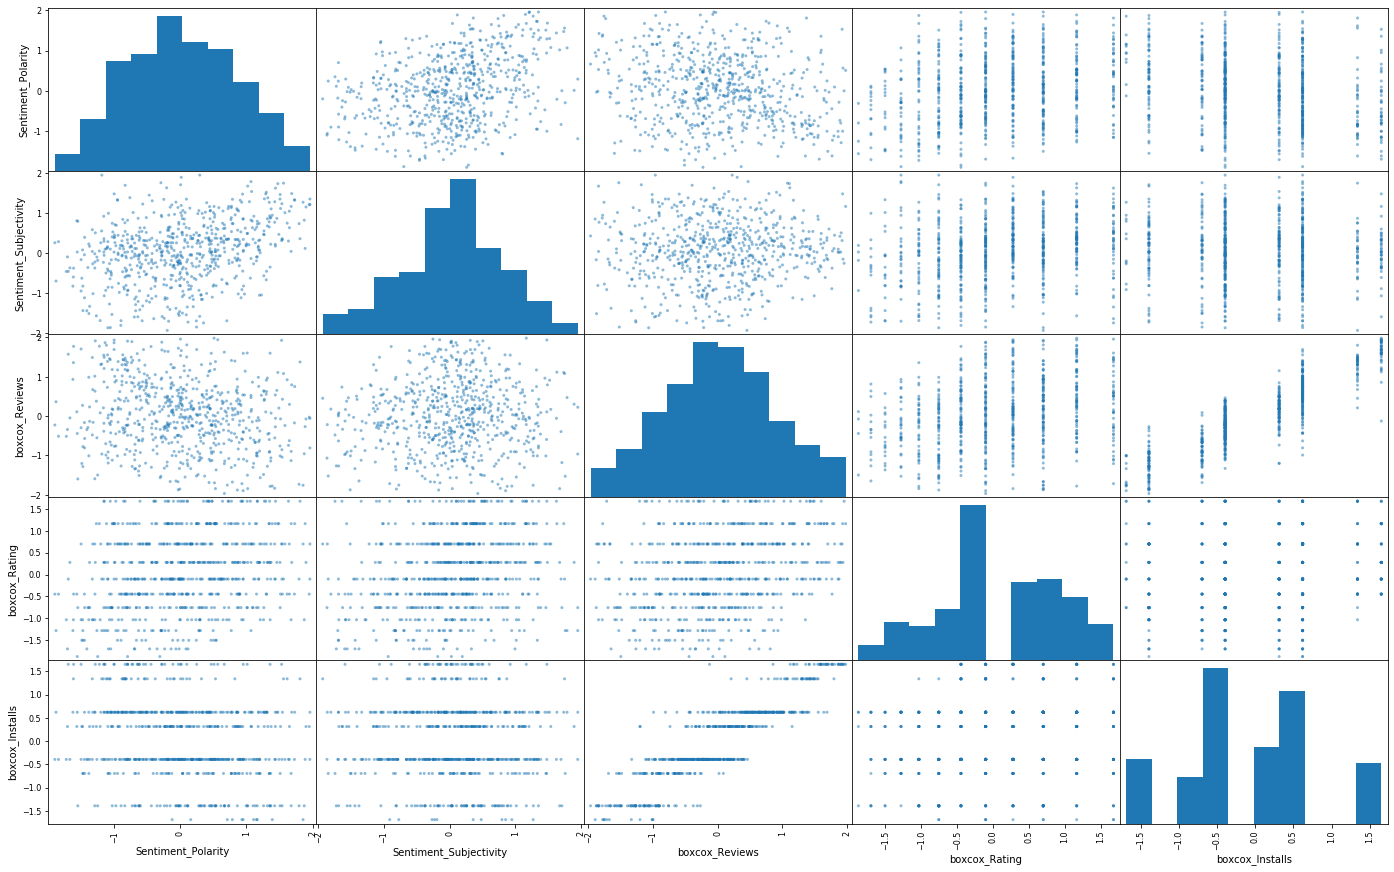

In [107]:
pd.plotting.scatter_matrix(feature_df.iloc[:,0:5], figsize=(24,15));
plt.savefig('endresult.png')

# Done with the data processing.

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = .2)

In [43]:
train_df = pd.concat([X_train,y_train],axis=1)

In [44]:
train_df.rename(columns={'Everyone 10+':'Everyone10', 'Mature 17+':'Mature17'}, inplace=True)

In [45]:
train_df

,Sentiment_Polarity,Sentiment_Subjectivity,boxcox_Reviews,boxcox_Rating,Everyone,Everyone10,Mature17,Teen,boxcox_Installs
App,,,,,,,,,
Dog Run - Pet Dog Simulator,-0.392937,0.174605,0.083308,1.676295,1,0,0,0,0.620424
Floor Plan Creator,0.397694,-0.309460,-0.029959,-0.756077,1,0,0,0,0.313333
"Amazon FreeTime – Kids’ Videos, Books, & TV shows",0.880810,0.189809,-1.095248,-0.446969,1,0,0,0,-0.696141
Basketball Stars,-1.156761,-0.056383,1.210360,0.277559,1,0,0,0,0.620424
CALCU™ Stylish Calculator Free,0.943205,-0.451808,0.536748,1.676295,1,0,0,0,0.313333
...,...,...,...,...,...,...,...,...,...
Babbel – Learn Languages,1.185248,0.076032,0.755237,-0.103392,1,0,0,0,0.620424
Doctor On Demand,1.165369,0.721960,-0.301847,1.676295,1,0,0,0,-0.393974
Candy Smash,-0.267886,0.285310,-0.501413,0.698959,1,0,0,0,-0.393974


In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

x_columns = '+'.join(train_df.columns[1:-1])

f = f'boxcox_Installs ~ {x_columns}'

model = ols(formula=f, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        boxcox_Installs   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     362.6
Date:                Wed, 08 Jan 2020   Prob (F-statistic):          4.33e-183
Time:                        09:17:51   Log-Likelihood:                -218.11
No. Observations:                 532   AIC:                             450.2
Df Residuals:                     525   BIC:                             480.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.0746      0.025     -2.978      0.003      -0.124      -0.025
Sentiment_Subjectivity    -0.0425      0.022     -1.975      0.049      -0.085      -0.000
boxcox_Reviews             0.8902      0.019     45.854      0.000       0.852       0.928
boxcox_Rating             -0.1287      0.020     -6.594      0.000      -0.167      -0.090
Everyone                   0.0983      0.029      3.433      0.001       0.042       0.155
Everyone10                -0.0501      0.070     -0.712      0.477      -0.188       0.088
Mature17                  -0.1156      0.065     -1.786      0.075      -0.243       0.012
Teen                      -0.0071      0.045     -0.159      0.874      -0.096       0.081
==============================================================================
Omnibus:                       15.283   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.721
Skew:                           0.271   Prob(JB):                     3.17e-05
Kurtosis:                       3.801   Cond. No.                     1.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.99e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

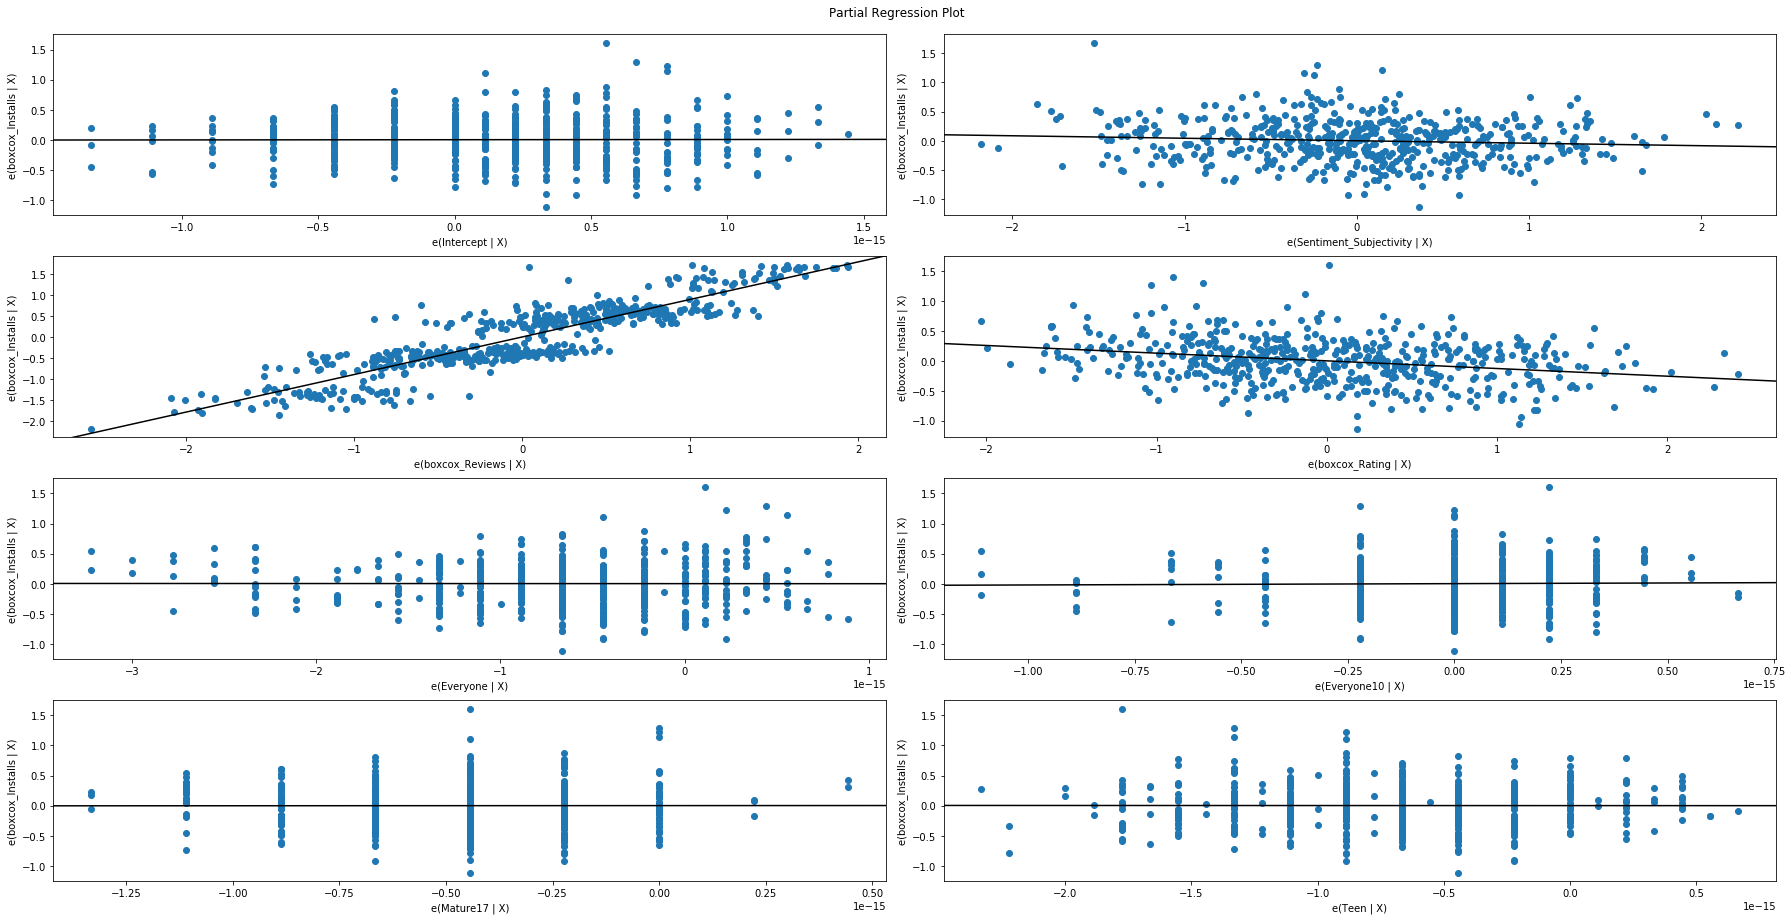

In [47]:
fig = plt.figure(figsize=(25,13))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
plt.savefig('partregressgrid.png')

In [48]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [49]:
train_res = y_hat_train - y_train
test_res = y_hat_test - y_test

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

train_rmse = sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Root Mean Squarred Error: 0.36421990009769906
Test Root Mean Squarred Error: 0.3906119090767518


In [54]:
test_set_r2 = r2_score(y_test, y_hat_test)

In [55]:
test_set_r2

0.8029932749011544

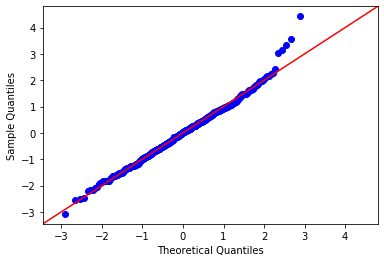

In [56]:
import scipy.stats as stats

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45',fit=True)

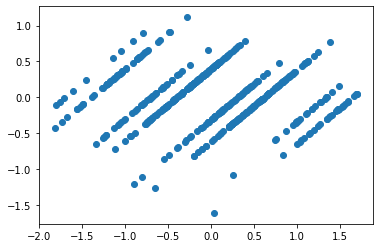

In [57]:
plt.scatter(y_hat_train, train_res)

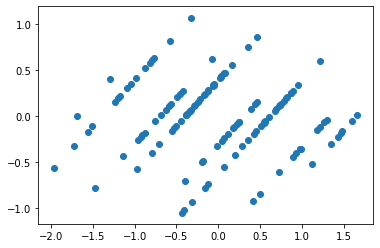

In [58]:
plt.scatter(y_hat_test, test_res)

In [59]:
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, feature, target, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results  = np.mean(cross_val_score(linreg, feature, target, cv=10,  scoring='neg_mean_squared_error'))
cv_20_results  = np.mean(cross_val_score(linreg, feature, target, cv=20,  scoring='neg_mean_squared_error'))

In [60]:
cv_5_results, cv_10_results, cv_20_results

(-0.1389859170667632, -0.13900049374861495, -0.139541926903598)

In [61]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train, y_train)
ridge_train_score = ridgeReg.score(X_train, y_train)
ridge_test_score = ridgeReg.score(X_test, y_test)

In [62]:
ridge_train_score, ridge_test_score

(0.803510285945261, 0.8001361662968326)

In [ ]:
n